In [11]:
## LOAD MODULES ##
# Third Party
import sys
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
import psyplot.project as psy
import pandas as pd
import xarray
from netCDF4 import Dataset,date2num
import xarray as xr
from matplotlib import cm
import datetime as dt
from iconarray.plot import formatoptions # import plotting formatoptions (for use with psyplot)
import iconarray as iconvis # import self-written modules from iconarray
import pickle
from matplotlib.lines import Line2D
pd.plotting.deregister_matplotlib_converters()

# First Party
sys.path.append('../utilities_tlezuo/')
# from timefunctions import *
import varfunctions as vf
import locfunctions as lf
import get_stations_timeseries as gs

###############################################################################################
# define class of pc_dict
class Point_coordinates:
    def __init__(self, shortname, name, color, marker, lat, lon, altitude, iconID, iconHSURF, iconHHL, iconHFL, height_dict):
        self.short = shortname
        self.name = name
        self.color = color
        self.marker = marker
        self.lat = lat
        self.lon = lon
        self.alt = altitude
        self.iconID = iconID 
        self.iconHSURF = iconHSURF
        self.iconHHL = iconHHL
        self.iconHFL = iconHFL
        self.hdict = height_dict 
# load pc_dict and its lists
pc_dict = np.load('../utilities_tlezuo/pc_dict.npy',allow_pickle=True).item()

In [12]:
# get an overview of what is around
with open ('../utilities_tlezuo/pc_short_list','rb') as a:
    pc_short_list = pickle.load(a)
pc_short_list

['LAN',
 'IMS',
 'HAI',
 'ZUG',
 'KUF',
 'KIE',
 'ROS',
 'MUC',
 'ALP',
 'egg',
 'terf',
 'hoch',
 'kols',
 'weer',
 'arb',
 'RIN',
 'UNI',
 'ifl',
 'murs']

In [26]:
###############################################################################################
## DECIDE WHAT TO LOAD ##
# variables
spvars_list=[vf.T_2M,vf.VEL_10M,vf.DIR_10M,vf.P]#,vf.P]#,vf.SW_d]
# location
loc = pc_dict['terf']
stat_type = 'ibox' # toni or ibox
provider = 'zamg'
provider = 'acinn' #UNI
# provider = 'dwd' # KIE, ROS, MUC

# type of icon data: std, hf, int
icon_type = 'std' 


In [27]:
# old setup directly from files
## LOAD DATA ICON TS ##
# if icon_type == 'std':# standard (15min)
#     #run2
#     ts_data_icon_RUN2 = xarray.open_mfdataset('/store/s83/tlezuo/RUN2_reference/out_std/lfff*')
#     ts_data_icon_RUN2 = ts_data_icon_RUN2.sel(ncells=loc.iconID,height=81,height_3=80,height_4=81)
#     #run3
#     ts_data_icon_RUN3 = xarray.open_mfdataset('/store/s83/tlezuo/RUN3_noconv/out_std/lfff*')
#     ts_data_icon_RUN3 = ts_data_icon_RUN2.sel(ncells=loc.iconID,height=81,height_3=80,height_4=81)
#     #run4
#     ts_data_icon_RUN4 = xarray.open_mfdataset('/store/s83/tlezuo/RUN4_cosmolev/out_std/lfff*')
#     ts_data_icon_RUN4 = ts_data_icon_RUN2.sel(ncells=loc.iconID,height=81,height_3=80,height_4=81)
# elif icon_type == 'hf': # high frequency (10s)
#     #run2
#     ts_data_icon_RUN2 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/hfsu_ts_data_RUN2_reference.nc')
#     ts_data_icon_RUN2 = ts_data_icon_RUN2.sel(ncells=loc.subsetID)
#     #run3
#     ts_data_icon_RUN3 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/hfsu_ts_data_RUN3_noconv.nc')
#     ts_data_icon_RUN3 = ts_data_icon_RUN3.sel(ncells=loc.subsetID)
#     #run4
#     ts_data_icon_RUN4 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/hfsu_ts_data_RUN4_cosmolev.nc')
#     ts_data_icon_RUN4 = ts_data_icon_RUN4.sel(ncells=loc.subsetID)
# elif icon_type == 'int' :# integrated (1h)
#     #run2
#     ts_data_icon_RUN2 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/intsu_ts_data_RUN2_reference.nc')
#     ts_data_icon_RUN2 = ts_data_icon_RUN2.sel(ncells=loc.subsetID)
#     #run3
#     ts_data_icon_RUN3 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/intsu_ts_data_RUN3_noconv.nc')
#     ts_data_icon_RUN3 = ts_data_icon_RUN3.sel(ncells=loc.subsetID)
#     #run4
#     ts_data_icon_RUN4 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/intsu_ts_data_RUN4_cosmolev.nc')
#     ts_data_icon_RUN4 = ts_data_icon_RUN4.sel(ncells=loc.subsetID)

In [28]:
## LOAD DATA ICON TS ##
if icon_type == 'std':# standard (15min)
    #run2
    ts_data_icon_RUN2 = xarray.open_mfdataset('/users/tlezuo/icon-vis/data/data_std/std_htd_data_RUN2_reference.nc')
    ts_data_icon_RUN2 = ts_data_icon_RUN2.sel(ncells=loc.subsetID,height=81,height_3=80,height_4=81)
    #run3
    ts_data_icon_RUN3 = xarray.open_mfdataset('/users/tlezuo/icon-vis/data/data_std/std_htd_data_RUN3_noconv.nc')
    ts_data_icon_RUN3 = ts_data_icon_RUN3.sel(ncells=loc.subsetID,height=81,height_3=80,height_4=81)
    #run4
    ts_data_icon_RUN4 = xarray.open_mfdataset('/users/tlezuo/icon-vis/data/data_std/std_htd_data_RUN4_cosmolev.nc')
    ts_data_icon_RUN4 = ts_data_icon_RUN4.sel(ncells=loc.subsetID,height=81,height_3=80,height_4=81)
elif icon_type == 'hf': # high frequency (10s)
    #run2
    ts_data_icon_RUN2 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/hfsu_ts_data_RUN2_reference.nc')
    ts_data_icon_RUN2 = ts_data_icon_RUN2.sel(ncells=loc.subsetID)
    #run3
    ts_data_icon_RUN3 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/hfsu_ts_data_RUN3_noconv.nc')
    ts_data_icon_RUN3 = ts_data_icon_RUN3.sel(ncells=loc.subsetID)
    #run4
    ts_data_icon_RUN4 = xr.open_dataset('/users/tlezuo/icon-vis/data/data_hfsu/hfsu_ts_data_RUN4_cosmolev.nc')
    ts_data_icon_RUN4 = ts_data_icon_RUN4.sel(ncells=loc.subsetID)

for ts_data_icon in [ts_data_icon_RUN2,ts_data_icon_RUN3,ts_data_icon_RUN4]:
    ts_data_icon['VEL_10M'] = ts_data_icon['VEL_10m'] 
    ts_data_icon['DIR_10M'] = ts_data_icon['DIR_10m'] 
    ts_data_icon['T'] =     ts_data_icon['T'] -273.15


In [29]:
ts_data_icon['T'].values

array([19.39160604, 19.52129763, 19.75200921, 20.25095233, 20.57921965,
       20.86757513, 20.93677679, 20.95401292, 21.06609371, 21.19508728,
       21.25871802, 21.26332595, 21.2138119 , 21.08850185, 20.91917291,
       20.71637454, 20.4612913 , 20.202164  , 19.85039737, 19.45788238,
       19.06491119, 18.62017824, 18.25536454, 18.00220862, 17.79268551,
       17.53132449, 17.37312258, 17.4005707 , 17.07674371, 16.75090074,
       16.45535222, 15.9883998 , 15.62206286, 15.43161341, 15.25886021,
       15.001832  , 14.71617192, 14.47518527, 14.32927584, 14.36186329,
       14.63563466, 14.80507593, 14.74652743, 14.59408343, 14.4442843 ,
       14.22984799, 13.91510584, 13.52645283, 13.19999253, 12.95902906,
       12.85349574, 12.75871652, 12.57575604, 12.28216613, 11.98238663,
       11.8522772 , 12.0293639 , 12.51475938, 13.12392744, 13.78430187,
       13.96603089, 13.71238327, 13.43309407, 13.30031975, 13.24914525,
       13.17629871, 13.15189938, 13.08688731, 12.98143726, 12.92

In [30]:
## LOAD DATA STATION ##
if stat_type == 'ibox':
    ts_data_stat = gs.read_acinn(loc=loc, 
                        vars=spvars_list,
                        path_ACINN= '/users/tlezuo/data/stations/ACINNiBox',
                        start_time = dt.datetime(2019,9,12,12,00).strftime("%Y-%m-%d %H:%M:%S"),
                        end_time = dt.datetime(2019,9,14,00,00).strftime("%Y-%m-%d %H:%M:%S"),
                        correct_direction=True)
    ts_data_stat['dt'] = pd.to_datetime(ts_data_stat["timestamp"])
else:
    ts_data_stat = np.load('/users/tlezuo/toni_codes/PLOTS/ts_stationdata.npy',allow_pickle='TRUE').item()
    ts_data_stat = ts_data_stat [loc.short]

2 files found for this station
found T_2M as tair2 in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Terfens_FLUX1_332b958e/data.csv
found VEL_10M as meanu2 in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Terfens_FLUX1_332b958e/data.csv
found DIR_10M as wind_dir2 in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Terfens_FLUX1_332b958e/data.csv
found P as pact in /users/tlezuo/data/stations/ACINNiBox/acinn_data_i-Box Terfens_RAW_ed06922e/data.csv
Index(['columns: T_2M', 'columns: VEL_10M', 'columns: DIR_10M', 'columns: P',
       'columns: timestamp'],
      dtype='object')


In [31]:
## test what one can find ##
ts_data_stat.columns
ts_data_stat.isna().sum()
# ts_data_stat.DD_10

T_2M         2089
VEL_10M      2089
DIR_10M      2089
P               0
timestamp    2089
dt           2089
dtype: int64

Text(0.5, 0, 'Time [h]')

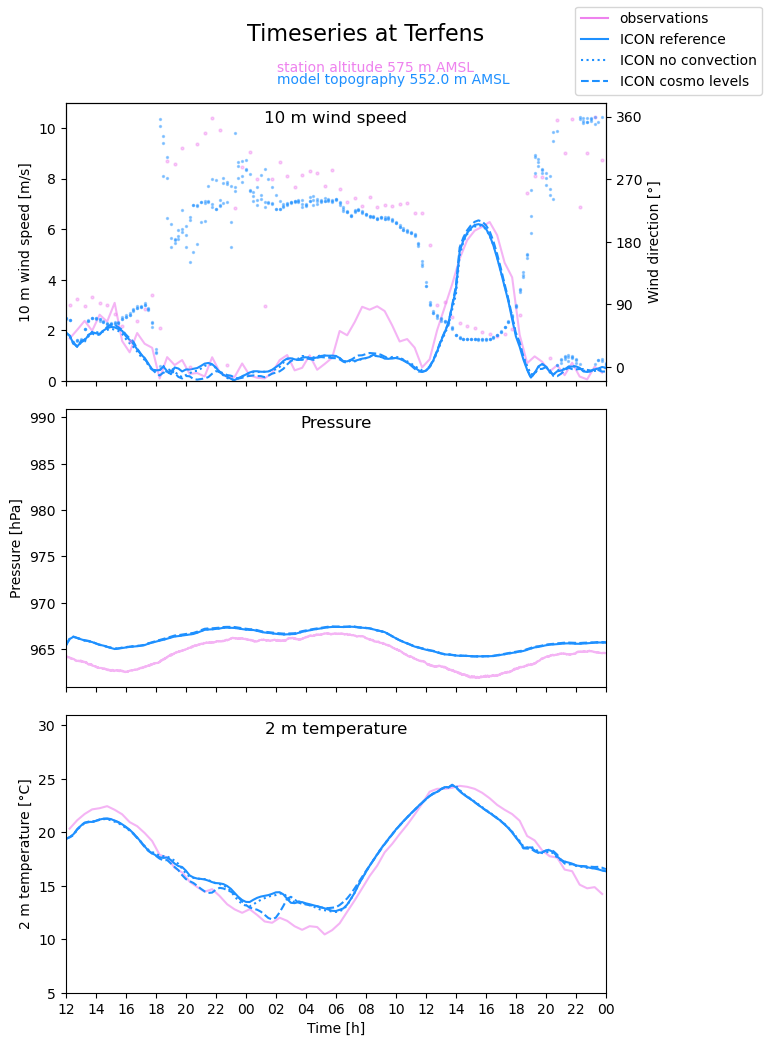

In [32]:
spvars_list=[vf.VEL_10M,vf.P,vf.T_2M,]
# explicit specification of variables for other stations
if stat_type == 'toni':
        if provider == 'zamg':
                time_str = 'time'
                dir_str = 'DD'
                spvars_str_list = ['FF','P','TL',]
                ts_data_stat['time']=ts_data_stat.index
        if provider == 'acinn':
                time_str = 'time'
                dir_str = 'wd_deg'
                spvars_str_list = ['ws_ms','p_hPa','t_K',]
                ts_data_stat['time']=ts_data_stat.index
        if provider == 'dwd':
                time_str = 'time'
                dir_str = 'DD_10'
                spvars_str_list = ['FF_10','PP_10','TT_10',]
                ts_data_stat['time']=ts_data_stat.index
else:
        time_str = 'dt'
        dir_str = vf.DIR_10M.name
        spvars_str_list = [spvars_list[0].name,spvars_list[1].name,spvars_list[2].name,]
        
# time range
startdate_plot = dt.datetime(2019,9,12,12,00)
enddate_plot = dt.datetime(2019,9,14,0,00)
plotfreq_plot = '2h0min'
plotdates_plot = pd.date_range(startdate_plot,enddate_plot,freq=plotfreq_plot)

# figure settings
fig, ax = plt.subplots(len(spvars_list),1, figsize=(8,10))
plt.subplots_adjust(bottom=0.01, right=0.8, top=0.9,hspace=0.1)
fig.suptitle('Timeseries at '+loc.name, fontsize=16)
ax[0].annotate('station altitude '+str(loc.alt)+' m AMSL', xy=(0.42,1.17),xytext=(0.39,1.11),xycoords=('axes fraction','axes fraction'),color='violet')
ax[0].annotate('model topography '+str(loc.iconHSURF.round())+' m AMSL', xy=(0.42,0.82),xytext=(0.39,1.07),xycoords=('axes fraction','axes fraction'),color='dodgerblue')
for ax_ts,spvar,spvar_str in zip(ax.flatten(),spvars_list,spvars_str_list):
        # OBS
        handle_obs = Line2D([0], [0], color='violet',linestyle='solid')
        # ax_ts.scatter(ts_data_stat[time_str],np.transpose(ts_data_stat[spvar_str]),color='violet',alpha=0.6, label='observations')
        ax_ts.plot(np.transpose(ts_data_stat[spvar_str]).dropna(),color='violet',alpha=0.6, label='observations')

        # ICON 
        # ax_ts.plot(plotdates_model,ts_data_icon[spvar.name],color='dodgerblue',label='ICON')
        plotdates_model = pd.date_range(startdate_plot,enddate_plot,freq='1h')
        # plotdates_model = ts_data_icon_RUN2.time
        handle_I2 = Line2D([0], [0], color='dodgerblue',linestyle='solid')
        handle_I3 = Line2D([0], [0], color='dodgerblue',linestyle='dotted')
        handle_I4 = Line2D([0], [0], color='dodgerblue',linestyle='dashed')
        # ax_ts.plot(ts_data_icon_RUN1.time,ts_data_icon_RUN1.TKE,color='gray',label='ICON old')
        if icon_type == 'std' and spvar.name == 'T_2M':
                ax_ts.plot(ts_data_icon_RUN2.time,ts_data_icon_RUN2['T'],color='dodgerblue',label='ICON reference')
                ax_ts.plot(ts_data_icon_RUN3.time,ts_data_icon_RUN3['T'],color='dodgerblue',linestyle = 'dotted', label='ICON no convection')
                ax_ts.plot(ts_data_icon_RUN4.time,ts_data_icon_RUN4['T'],color='dodgerblue',linestyle = 'dashed',label='ICON cosmo levels')
        else:
                ax_ts.plot(ts_data_icon_RUN2.time,ts_data_icon_RUN2[spvar.name],color='dodgerblue',label='ICON reference')
                ax_ts.plot(ts_data_icon_RUN3.time,ts_data_icon_RUN3[spvar.name],color='dodgerblue',linestyle = 'dotted', label='ICON no convection')
                ax_ts.plot(ts_data_icon_RUN4.time,ts_data_icon_RUN4[spvar.name],color='dodgerblue',linestyle = 'dashed',label='ICON cosmo levels')

        # plotting options
        if spvar.name == 'P':
                ax_ts.set_ylim(np.mean(ts_data_icon_RUN2.P)-5,np.mean(ts_data_icon_RUN2.P)+25)
        else:
                ax_ts.set_ylim(spvar.min,spvar.max)
        ax_ts.set_xlim(startdate_plot,enddate_plot)
        # ax_ts.grid()
        ax_ts.set_title(spvar.title, y=1.0, pad=-14)
        # ax_ts.set_xlabel('Time [h]')
        ax_ts.set_xticks(plotdates_plot)
        ax_ts.set_xticklabels([])
        ax_ts.set_ylabel(spvar.title+' '+spvar.units)
        # fig.legend(labels=('observations','ICON'),loc=(0.75,0.935))
        # ax_ts.annotate('(obs at '+str(loc.hdict[spvar.name])+' m AGL)', xy=(0.40,0.92),xytext=(0.39,0.92),xycoords=('axes fraction','axes fraction'),color='violet')

        ##################################################################################################
        # ## DIR if VEL is plotted ##
        if spvar.name == 'VEL_10M':
                # plot
                ax_ts_2 = ax_ts.twinx()
                ax_ts_2.scatter(ts_data_stat[time_str],np.transpose(ts_data_stat[dir_str]),color='violet',alpha=0.4,s=4) # station obs
                # model
                ax_ts_2.scatter(ts_data_icon_RUN2.time,ts_data_icon_RUN2['DIR_10M'],color='dodgerblue',alpha=0.4,s=2)
                ax_ts_2.scatter(ts_data_icon_RUN3.time,ts_data_icon_RUN3['DIR_10M'],color='dodgerblue',alpha=0.4,s=2)
                ax_ts_2.scatter(ts_data_icon_RUN4.time,ts_data_icon_RUN4['DIR_10M'],color='dodgerblue',alpha=0.4,s=2)

                # plotting options
                ax_ts_2.set_ylim(-20,380)
                ax_ts_2.set_yticks(np.arange(0,365,90))
                ax_ts_2.set_ylabel('Wind direction [°]')
                ax_ts_2.set_xlim(startdate_plot,enddate_plot)
                ax_ts.set_xticklabels([])
                ax_ts_2.set_xticks(plotdates_plot)
                # ax_ts_2.set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])

legend_handles=[handle_obs,handle_I2,handle_I3, handle_I4]
legend_labels=['observations','ICON reference','ICON no convection','ICON cosmo levels']
fig.legend(legend_handles,legend_labels)
ax[-1].set_xticklabels(labels=[j.strftime('%H') for j in plotdates_plot])
ax[-1].set_xlabel('Time [h]')

In [33]:
ts_data_stat[dir_str].isna().sum()

2089